## torchvision 的使用
* PyTorch 为我们提供了一种十分方便的数据读取机制，即使用 Dataset 类与 DataLoader 类的组合，来得到数据迭代器。在训练或预测时，数据迭代器能够输出每一批次所需的数据，并且对数据进行相应的预处理与数据增强操作。
* Dataset 类是一个抽象类，它可以用来表示数据集。我们通过继承 Dataset 类来自定义数据集的格式、大小和其它属性，后面就可以供 DataLoader 类直接使用。
* DataLoader类 在实际项目中，如果数据量很大，考虑到内存有限、I/O 速度等问题，在训练过程中不可能一次性的将所有数据全部加载到内存中，也不能只用一个进程去加载，所以就需要多进程、迭代加载，而 DataLoader 就是基于这些需要被设计出来的。
* Torchvision 库就是常用数据集 + 常见网络模型 + 常用图像处理方法。

In [22]:
import torch
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image

In [4]:

# Dataset例子
class MyDataset(Dataset):
    # 构造函数
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    # 返回数据集大小
    def __len__(self):
        return self.data_tensor.size(0)
    # 返回索引的数据与标签
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [5]:
# 生成数据
data_tensor = torch.randn(10, 3)
print('data_tensor: ', data_tensor)
target_tensor = torch.randint(2, (10,)) # 标签是0或1
print('target_tensor: ', target_tensor)

# 将数据封装成Dataset
my_dataset = MyDataset(data_tensor, target_tensor)

# 查看数据集大小
print('Dataset size:', len(my_dataset))


# 使用索引调用数据
print('tensor_data[0]: ', my_dataset[0])


data_tensor:  tensor([[ 0.5456, -0.3697,  1.7843],
        [ 1.4948, -0.2646, -0.7312],
        [ 1.0977,  0.7644,  0.5398],
        [ 0.8304,  0.8240,  0.3055],
        [-0.4645, -0.0923, -2.1203],
        [-0.5931, -0.3481, -1.2772],
        [ 0.7527,  0.4734,  0.0371],
        [ 0.2965, -0.2792,  0.2033],
        [ 0.5971,  0.9260,  1.7417],
        [ 1.4578,  0.3668,  0.4802]])
target_tensor:  tensor([1, 1, 1, 1, 0, 0, 1, 0, 0, 1])
Dataset size: 10
tensor_data[0]:  (tensor([ 0.5456, -0.3697,  1.7843]), tensor(1))


In [ ]:
torch.randint(2, (10,))

tensor([[0, 1, 1, 0, 0, 0, 1, 0, 1, 0]])

In [13]:
tensor_dataloader = DataLoader(dataset=my_dataset, # 传入的数据集, 必须参数
                               batch_size=2,       # 输出的batch大小
                               shuffle=True,       # 数据是否打乱
                               num_workers=0)      # 进程数, 0表示只有主进程

# 以循环形式输出
for data, target in tensor_dataloader: 
    print(data, target)

 
# 输出一个batch
print('One batch tensor data: ', next(iter(tensor_dataloader)))


tensor([[ 1.0977,  0.7644,  0.5398],
        [-0.4645, -0.0923, -2.1203]]) tensor([1, 0])
tensor([[0.7527, 0.4734, 0.0371],
        [0.8304, 0.8240, 0.3055]]) tensor([1, 1])
tensor([[1.4578, 0.3668, 0.4802],
        [0.5971, 0.9260, 1.7417]]) tensor([1, 0])
tensor([[ 1.4948, -0.2646, -0.7312],
        [-0.5931, -0.3481, -1.2772]]) tensor([1, 0])
tensor([[ 0.2965, -0.2792,  0.2033],
        [ 0.5456, -0.3697,  1.7843]]) tensor([0, 1])
One batch tensor data:  [tensor([[-0.5931, -0.3481, -1.2772],
        [-0.4645, -0.0923, -2.1203]]), tensor([0, 0])]


#### mnist数据集
* 手写字数据集

In [14]:
# 以MNIST为例

mnist_dataset = torchvision.datasets.MNIST(root='./data',
                                       train=True,
                                       transform=None,
                                       target_transform=None,
                                       download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:11<00:00, 897kB/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 112kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:02<00:00, 558kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [15]:
type(mnist_dataset)

torchvision.datasets.mnist.MNIST

In [20]:
mnist_dataset_list = list(mnist_dataset)
# 图片显示
display(mnist_dataset_list[0][0])
print("value:",mnist_dataset_list[0][1])

value: 5


#### torchvision.transforms
* torchvision.transforms包中提供了常用的图像操作，包括对 Tensor 及 PIL Image 对象的操作，例如随机切割、旋转、数据类型转换等等。
* 数据类型转换
* 对 PIL.Image 和 Tensor 进行变化和变换的组合

In [26]:
img = Image.open('7.png')
display(img)
print(type(img))

# PIL.Image转换为Tensor
img1 = transforms.ToTensor()(img)
print(type(img1))
# Tensor转换为PIL.Image
img2 = transforms.ToPILImage()(img1) 
#PIL.Image.Image
print(type(img2))

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


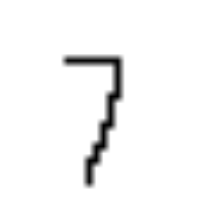

In [28]:
# 定义一个Resize操作
resize_img_oper = transforms.Resize((200,200), interpolation=2)
# 原图
orig_img = Image.open('7.png') 
display(orig_img)
# resize之后的图像
img = resize_img_oper(orig_img)
display(img)



### 图片裁剪
* `torchvision.transforms.CenterCrop(size)` 在中心裁剪指定的 PIL Image 或 Tensor
* `torchvision.transforms.RandomCrop(size, padding=None)` 随机裁剪，在一个随机位置剪裁指定的 PIL Image 或 Tensor
* `torchvision.transforms.FiveCrop(size)` 分别从四角和中心进行剪裁，共剪裁成五块

In [30]:


# 定义剪裁操作
center_crop_oper = transforms.CenterCrop((20,20))
random_crop_oper = transforms.RandomCrop((20,20))
five_crop_oper = transforms.FiveCrop((15,15))

# 原图
orig_img = Image.open('7.png') 
display(orig_img)

# 中心剪裁
img1 = center_crop_oper(orig_img)
display(img1)
# 随机剪裁
img2 = random_crop_oper(orig_img)
display(img2)
# 四角和中心剪裁
imgs = five_crop_oper(orig_img)
for img in imgs:
    display(img)

#### 图像翻转

In [31]:
# 定义翻转操作
# 水平翻转
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
# 垂直翻转
v_flip_oper = transforms.RandomVerticalFlip(p=1)

# 原图
orig_img = Image.open('7.png') 
display(orig_img)

# 水平翻转
img1 = h_flip_oper(orig_img)
display(img1)
# 垂直翻转
img2 = v_flip_oper(orig_img)
display(img2)

### 标准化
* 标准化是指每一个数据点减去所在通道的平均值
* 图像进行标准化，就是对图像的每个通道利用均值和标准差进行正则化。这样做的目的，是为了保证数据集中所有的图像分布都相似，这样在训练的时候更容易收敛，既加快了训练速度，也提高了训练效果。
* torchvision.transforms.Normalize(mean, std, inplace=False) 标准化函数
    * mean：表示各通道的均值；
    * std：表示各通道的标准差；
    * inplace：表示是否原地操作，默认为否。

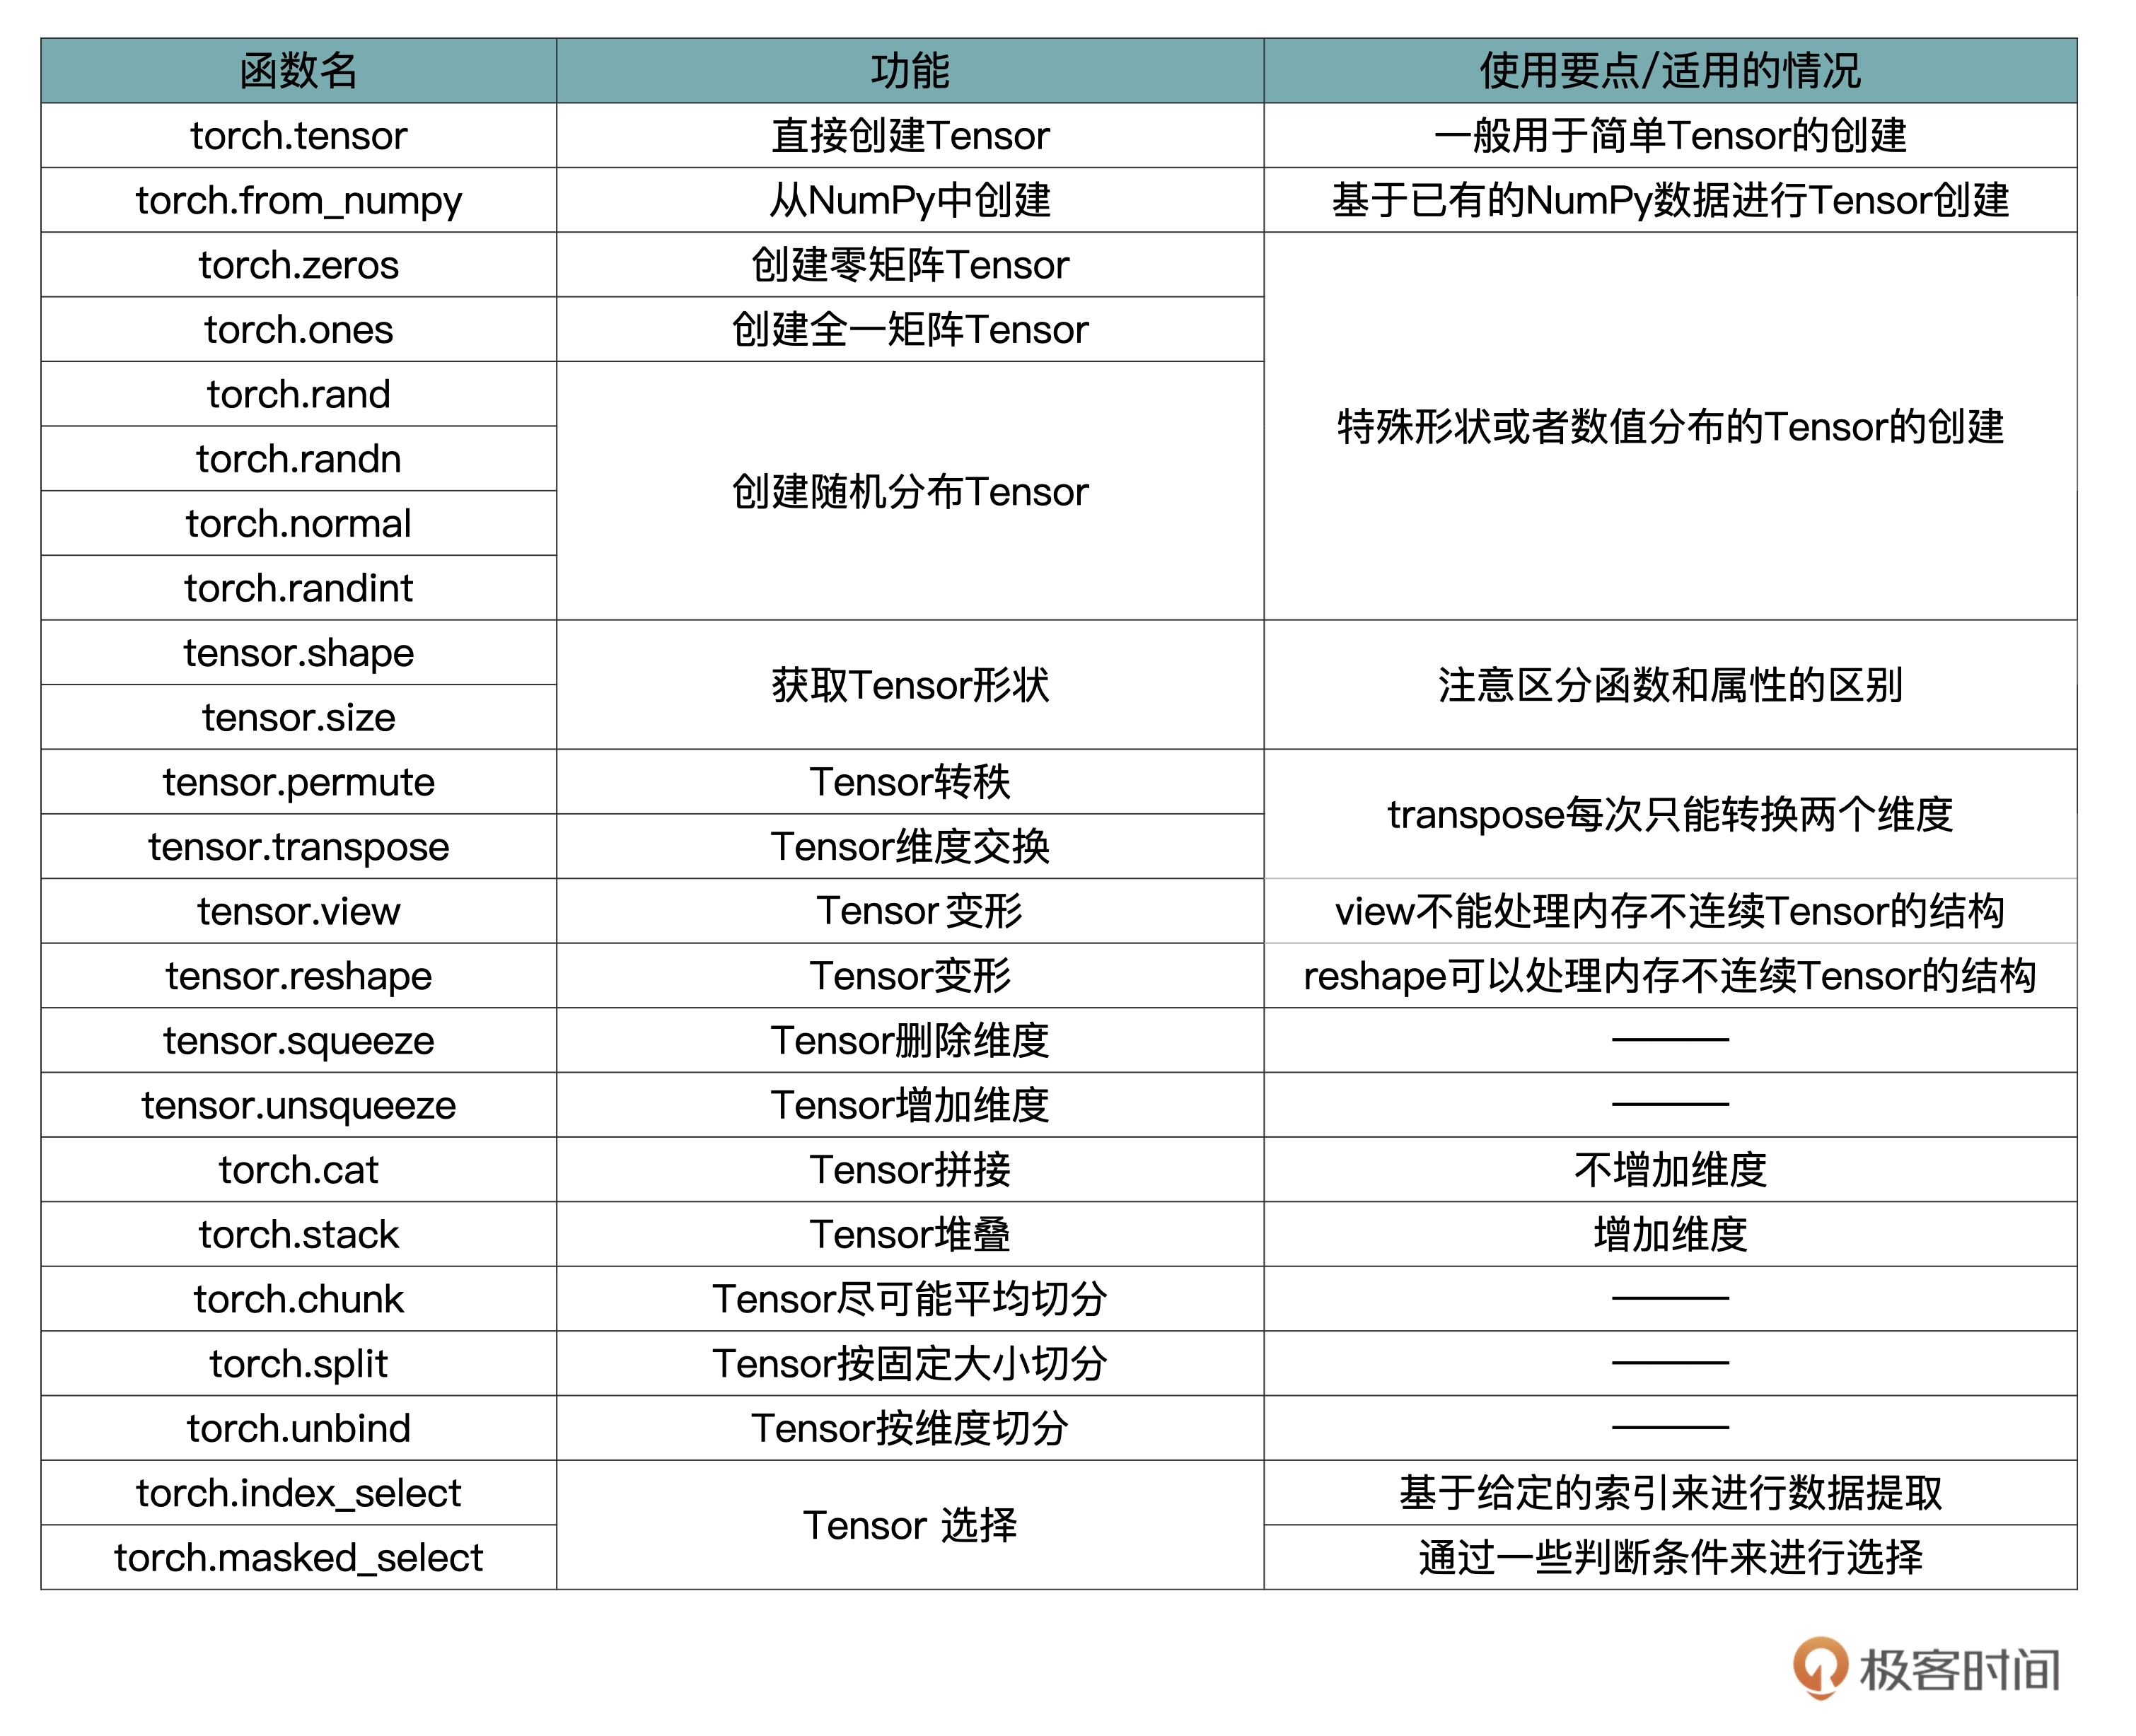

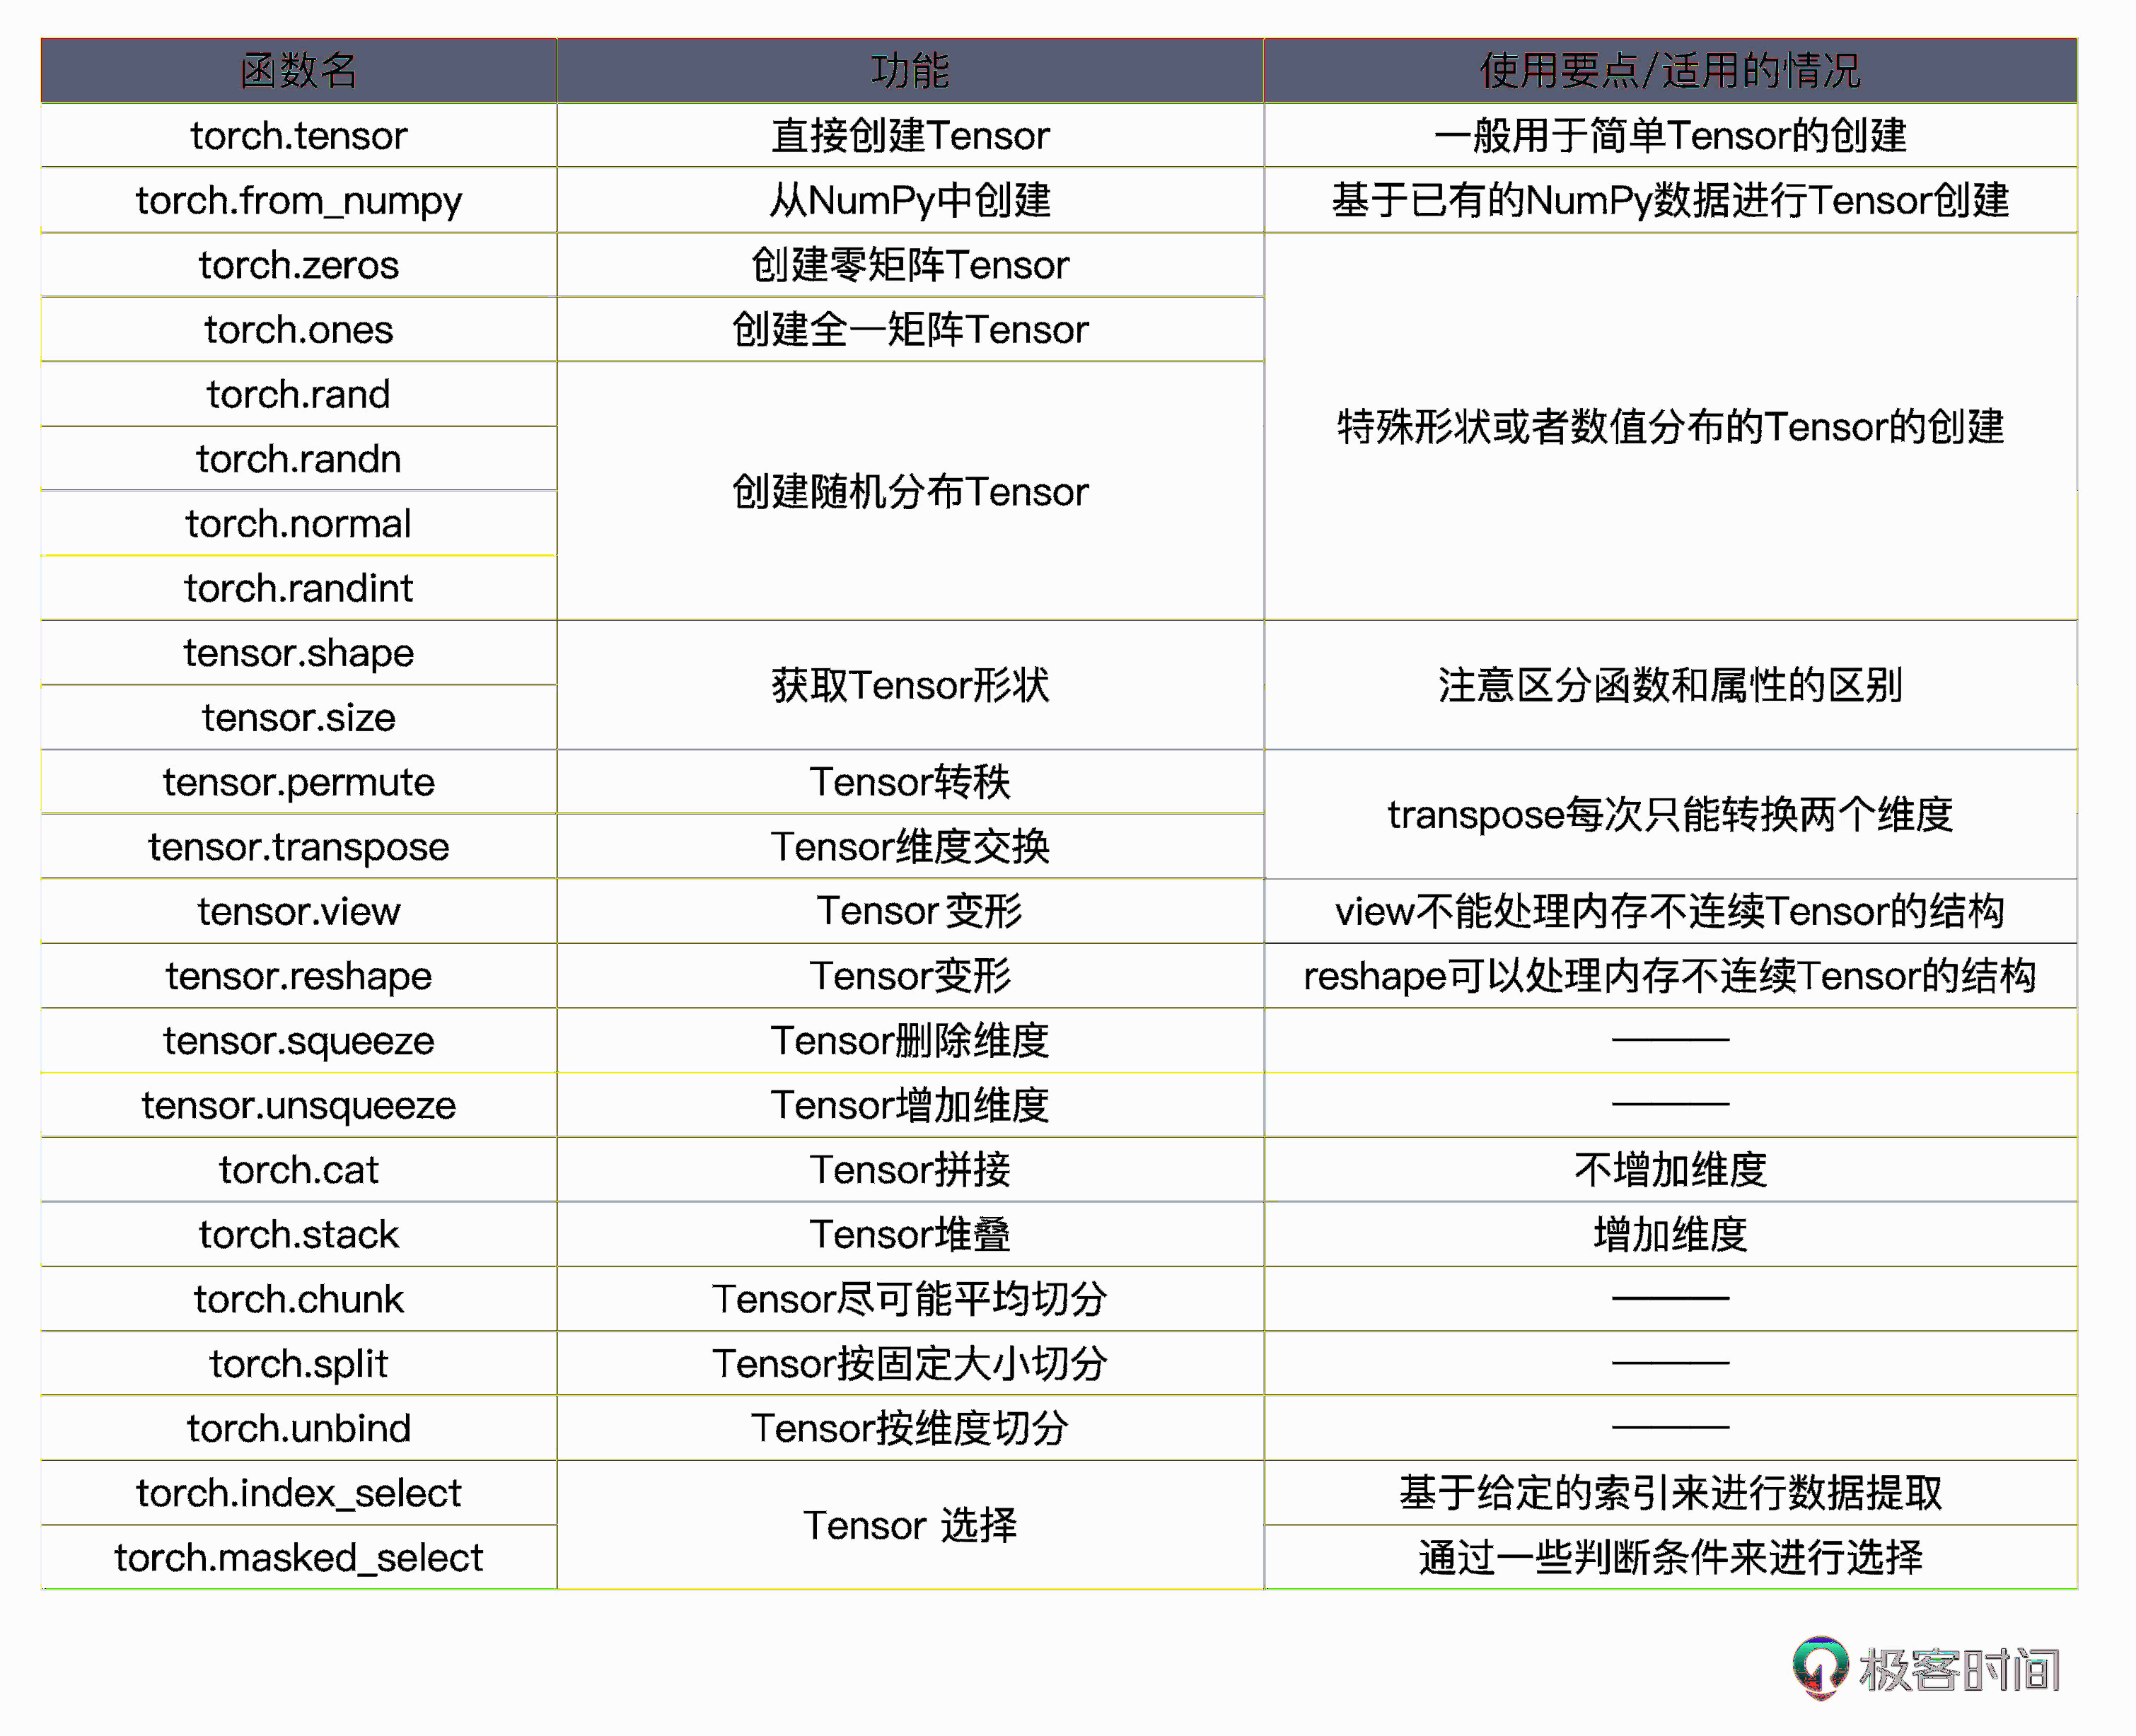

In [34]:

# 定义标准化操作
norm_oper = transforms.Normalize((0.2, 0.2, 0.2), (0.2, 0.2, 0.2))

# 原图
orig_img = Image.open('image.png') 
display(orig_img)

# 图像转化为Tensor
img_tensor = transforms.ToTensor()(orig_img)

# 标准化
tensor_norm = norm_oper(img_tensor)

# Tensor转化为图像
img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

### 变换组合，使用Compose类
Compose 类是将多个变换组合到一起
torchvision.transforms.Compose(transforms)，transforms 是一个 Transform 对象的列表，表示要组合的变换列表


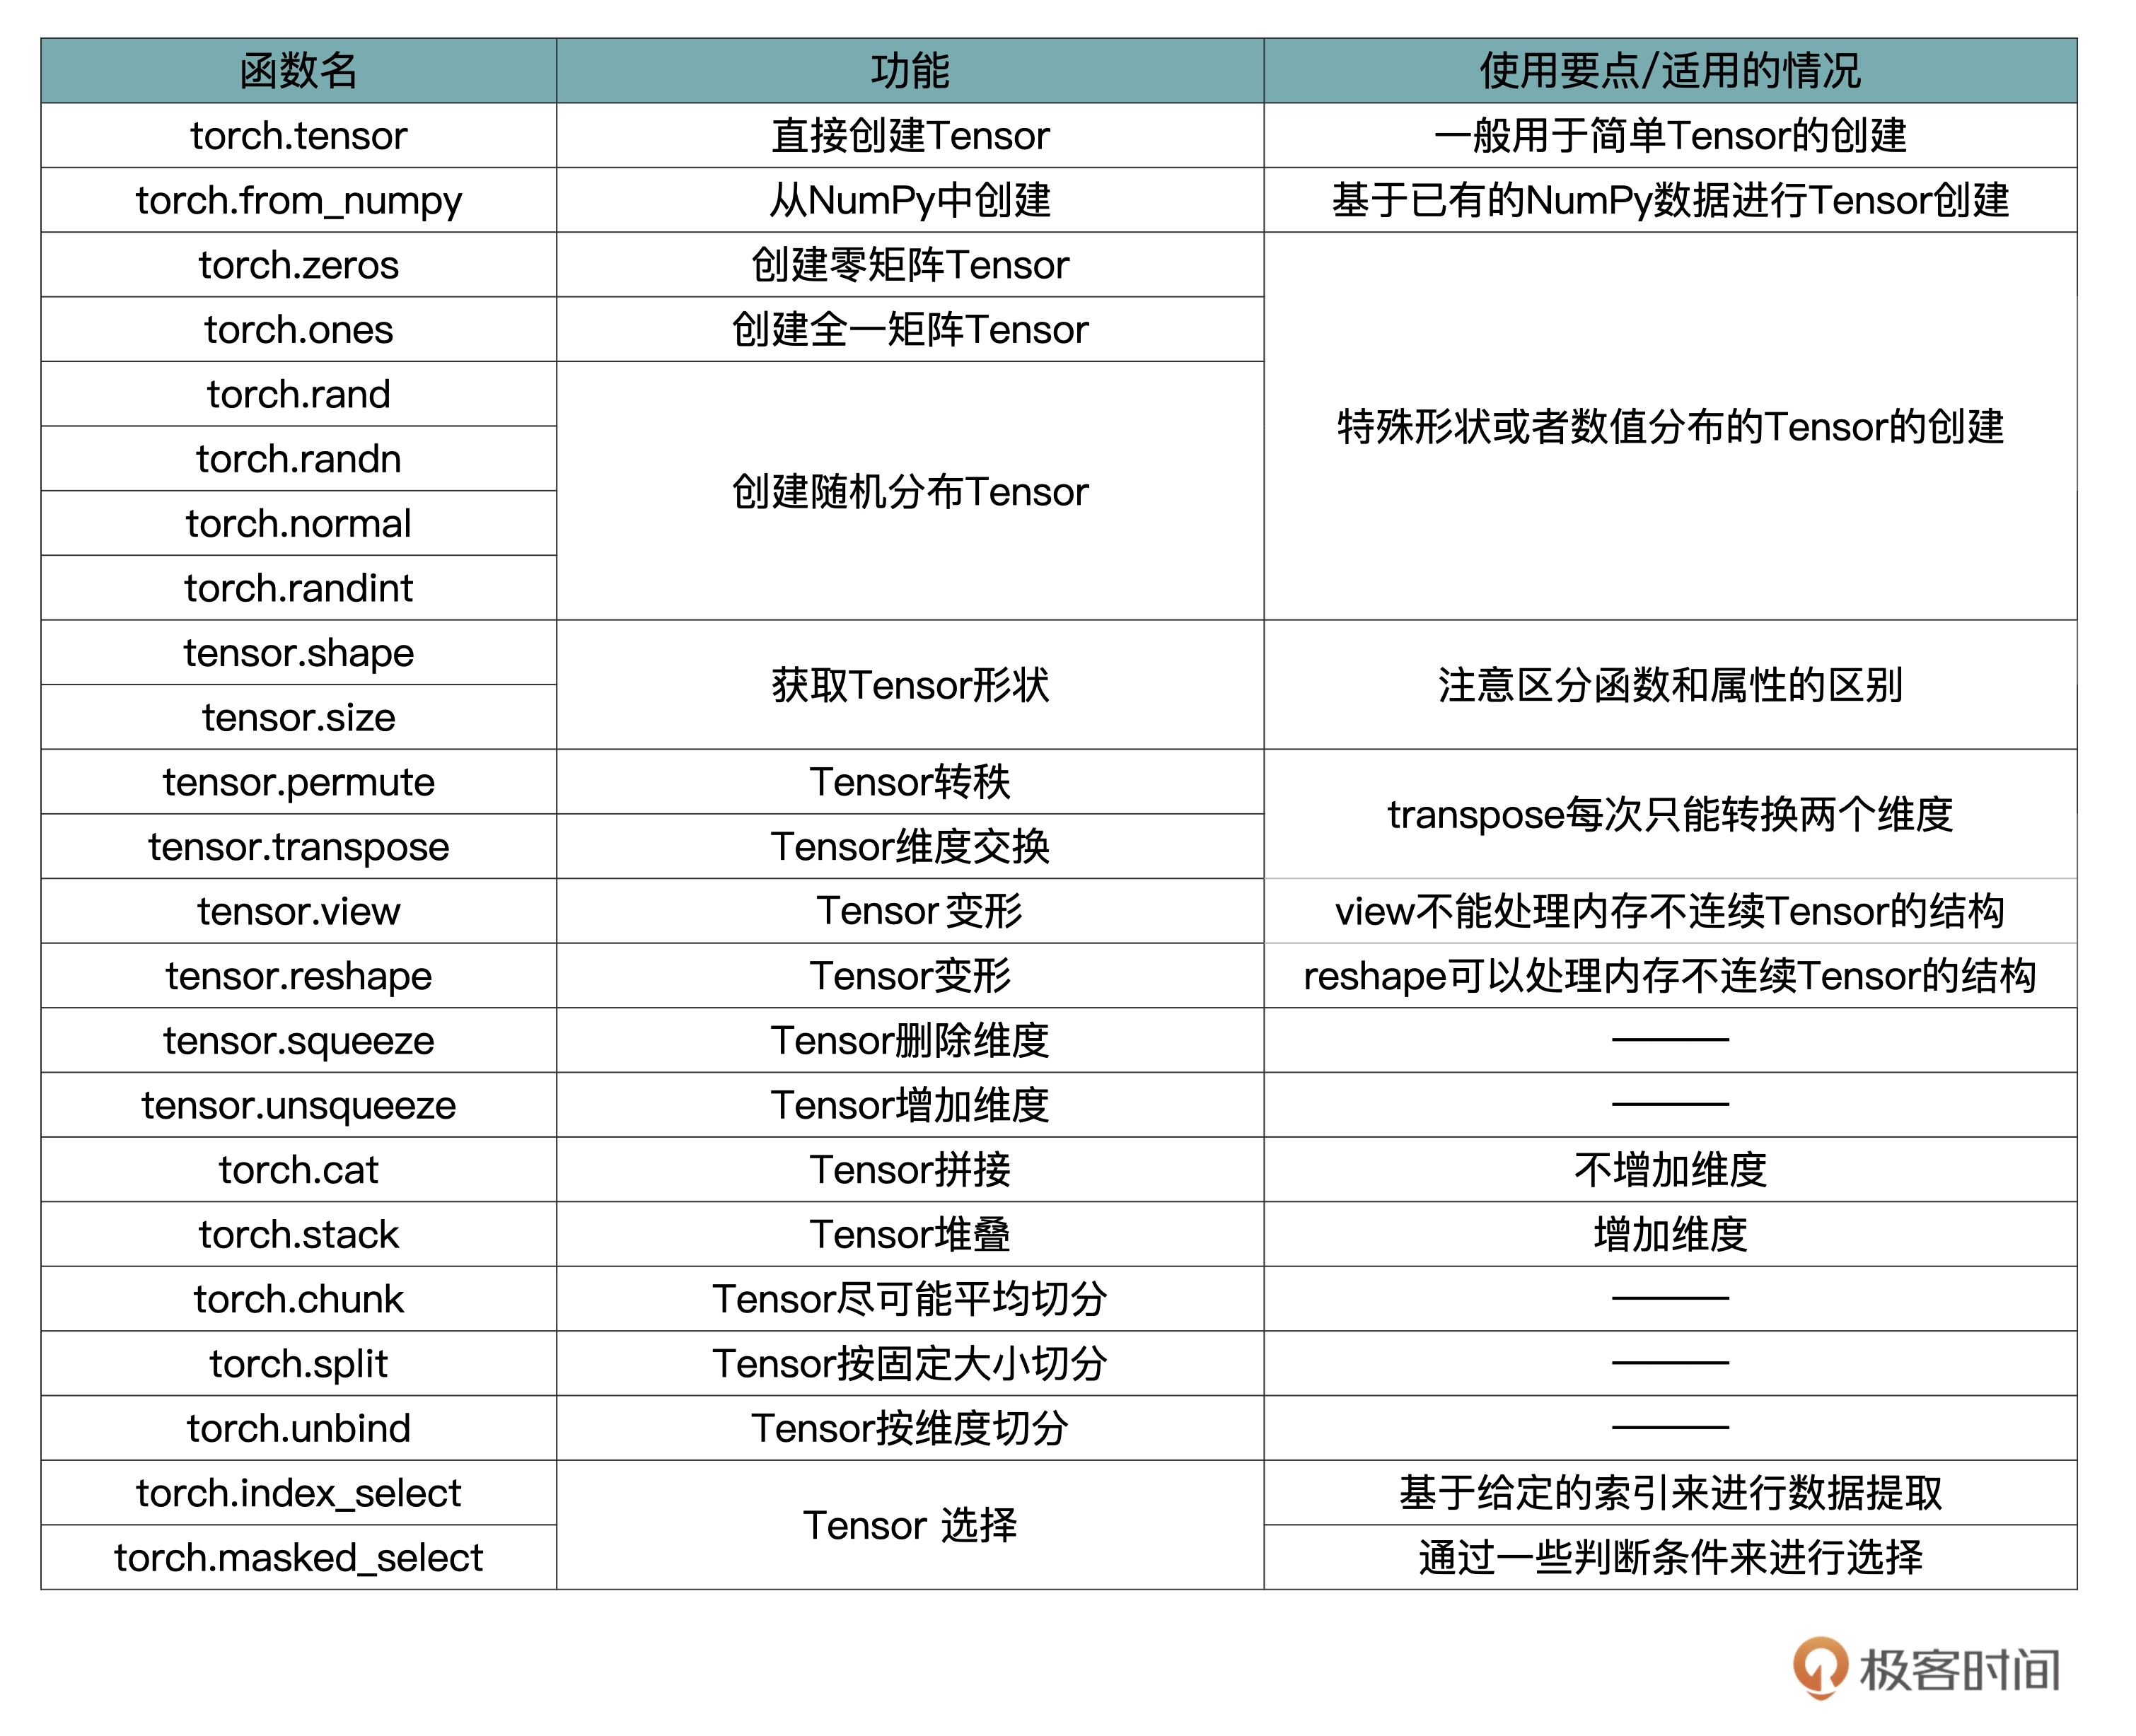

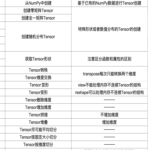

In [40]:
orig_img = Image.open('image.png')
# 原图
display(orig_img)
# 定义操作组合,先调整大小，再进行随机裁剪
composed = transforms.Compose([transforms.Resize((200,200)),transforms.RandomCrop(150)])
img = composed(orig_img)
display(img)

#### 以mnist为例子，对数据进行预处理



In [42]:
from torchvision import datasets
# 组合变化
my_transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize((0.5), (0.5))])
#数据读取
mnist_dataset = datasets.MNIST(root='./data', train=False, transform=my_transform, target_transform=None, download=True)
item = mnist_dataset.__getitem__(0)
# 变换后的数据
print(type(item[0]))

<class 'torch.Tensor'>
